# import csv

In [47]:
import numpy as np
import pandas as pd

In [48]:
df=pd.read_csv("Ecommerce Customers.csv")

In [49]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# show the variance

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

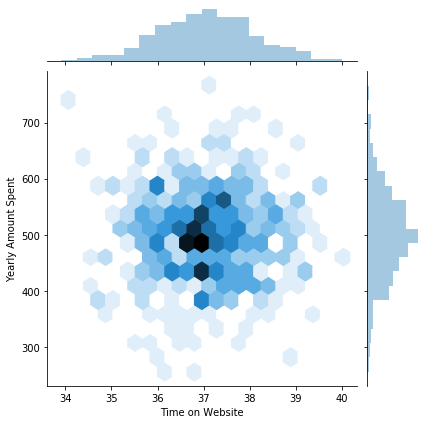

In [13]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent',kind='hex')

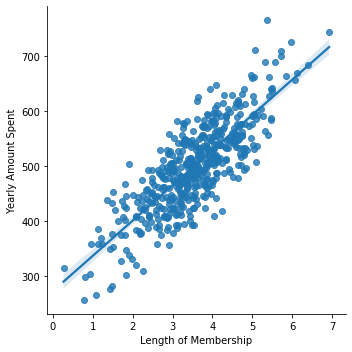

In [16]:
sns.lmplot(data=df,x='Length of Membership',y='Yearly Amount Spent')

# train_test_split

In [17]:
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [18]:
Y=df[['Yearly Amount Spent']]

In [20]:
from sklearn.model_selectionel_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=100)

# use linear regression to train_test model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lr.coef_

array([[26.1373134 , 38.56931047,  0.26527411, 61.82879077]])

In [30]:
pred=lr.predict(X_test)

Text(0, 0.5, 'pred v')

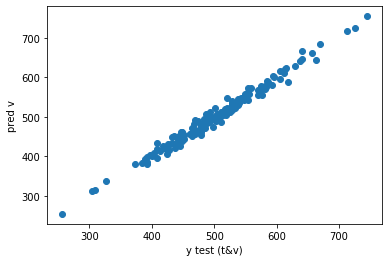

In [33]:
plt.scatter(y_test,pred)
plt.xlabel('y test (t&v)')
plt.ylabel('pred v')

# show the effect

In [34]:
from sklearn import metrics

In [38]:
print('MAE',metrics.mean_absolute_error(y_test,pred))
print('MSE',metrics.mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 8.0473318001094
MSE 105.43175305085185
RMSE 10.267996545132446


In [39]:
metrics.explained_variance_score(y_test,pred)

0.981951633081673

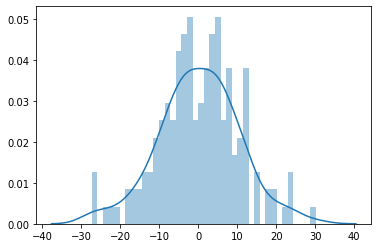

In [40]:
sns.distplot((y_test-pred),bins=40)